<a href="https://colab.research.google.com/github/raha86/Linear_Regression_Car_price_prediction/blob/main/Linear_Regression_car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Multiple Linear Regression**

## **Problem Statement**

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

## **Business Goal**

We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [ ]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#loading the dataset
cars = pd.read_csv('/content/drive/MyDrive/dataset/car_price_dataset/car_price_dataset.csv')

In [ ]:
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# **Exploratory Data Analysis**

In [ ]:
cars.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [ ]:
cars.shape

(205, 26)

In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
cars.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


In [ ]:
cars.describe(include='O').T

,count,unique,top,freq
CarName,205,147,peugeot 504,6
fueltype,205,2,gas,185
aspiration,205,2,std,168
doornumber,205,2,four,115
carbody,205,5,sedan,96
drivewheel,205,3,fwd,120
enginelocation,205,2,front,202
enginetype,205,7,ohc,148
cylindernumber,205,7,four,159
fuelsystem,205,8,mpfi,94


**checking for duplicates**

In [ ]:
cars.duplicated().sum()

np.int64(0)

**checking for null values**

In [ ]:
cars.isnull().sum()

,0
car_ID,0
symboling,0
CarName,0
fueltype,0
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0
wheelbase,0


In [ ]:
# Drop non required columns
cars.drop(['car_ID', 'CarName'], axis=1, inplace=True)

In [ ]:
cars['doornumber'].unique()

array(['two', 'four'], dtype=object)

In [ ]:
cars['doornumber'].replace({'four': 4, 'two': 2}, inplace=True)
cars['doornumber'] = cars['doornumber'].astype('int64')

<ipython-input-308-1cfe1dc5247d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars['doornumber'].replace({'four': 4, 'two': 2}, inplace=True)
<ipython-input-308-1cfe1dc5247d>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cars['doornumber'].replace({'four': 4, 'two': 2}, inplace=True)


In [ ]:
cars['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [ ]:
cars['cylindernumber'].replace({'four': 4, 'six': 6, 'five': 5, 'eight': 8, 'two': 2, 'twelve': 12, 'three': 3}, inplace=True)
cars['cylindernumber'] = cars['cylindernumber'].astype('int64')

<ipython-input-310-d30992c0ad60>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars['cylindernumber'].replace({'four': 4, 'six': 6, 'five': 5, 'eight': 8, 'two': 2, 'twelve': 12, 'three': 3}, inplace=True)
<ipython-input-310-d30992c0ad60>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cars['cyl

In [ ]:
cars.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## **Label Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cars.columns:
    if cars[col].dtype == 'object':
        cars[col] = le.fit_transform(cars[col])


In [ ]:
cars.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,1,0,2,0,2,0,88.6,168.8,64.1,48.8,2548,0,4,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,1,0,2,0,2,0,88.6,168.8,64.1,48.8,2548,0,4,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,0,2,2,2,0,94.5,171.2,65.5,52.4,2823,5,6,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,1,0,4,3,1,0,99.8,176.6,66.2,54.3,2337,3,4,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,1,0,4,3,0,0,99.4,176.6,66.4,54.3,2824,3,5,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


# **Understanding the relationship between the dependent and independent variables using a pairplot**

<Figure size 1000x500 with 0 Axes>

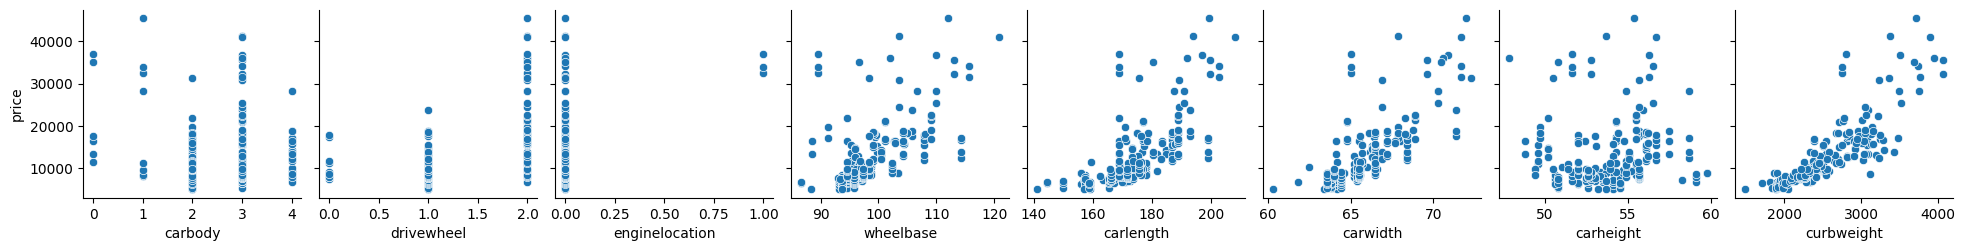

In [ ]:
plt.figure(figsize=(10,5))
sns.pairplot(data = cars, y_vars=['price'], x_vars=[
                                                    'carbody',
                                                    'drivewheel',
                                                    'enginelocation',
                                                    'wheelbase',
                                                    'carlength',
                                                    'carwidth',
                                                    'carheight',
                                                    'curbweight'
                                                    ])

## **Observations**
Wheelbase, carlength, carwidth, curbweight share positive linear relationship with the target variable.

<Figure size 1000x500 with 0 Axes>

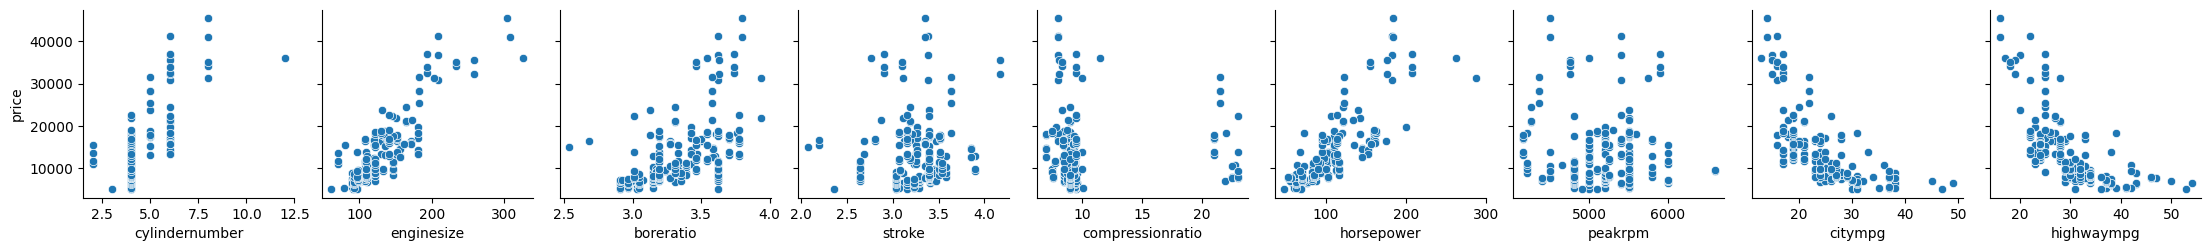

In [ ]:
plt.figure(figsize=(10,5))
sns.pairplot(data = cars, y_vars=['price'], x_vars=[
                                                    'cylindernumber',
                                                    'enginesize',
                                                    'boreratio',
                                                    'stroke',
                                                    'compressionratio',
                                                    'horsepower',
                                                    'peakrpm',
                                                    'citympg',
                                                    'highwaympg'
])

## **Observations**
Enginsize, boreratio, horsepower share positive linear relationship with the target variable.

citympg, highwaympg share negative linear relationship with the target variable

<Figure size 1000x500 with 0 Axes>

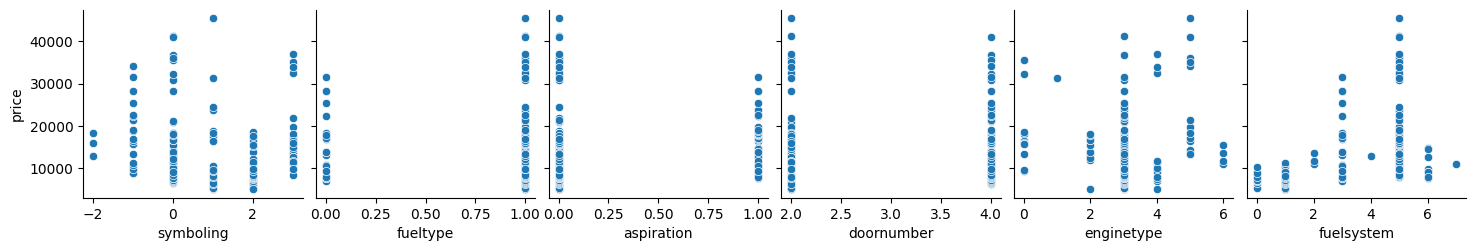

In [ ]:
plt.figure(figsize=(10, 5))
sns.pairplot(data = cars, y_vars=['price'], x_vars=['symboling',
                                                    'fueltype',
                                                    'aspiration',
                                                    'doornumber',
                                                    'enginetype',
                                                    'fuelsystem',
])

## **Interpretation**

With increase in Wheelbase, carlength, carwidth, curbweight, Enginsize, boreratio, horsepower Car price increases.

Also, expensive cars tend to give less citympg, highwaympg.


# **Feature Selection for data modelling**

In [ ]:
correlation = cars.corr()
correlation

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,0.194311,-0.059866,-0.664073,-0.596135,-0.041671,0.212471,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,0.050372,-0.113129,-0.105790,0.091163,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
fueltype,0.194311,1.000000,-0.401397,-0.191491,-0.147853,-0.132257,0.040070,-0.308346,-0.212679,-0.233880,-0.284631,-0.217275,0.082695,0.024544,-0.069594,0.041529,-0.054451,-0.241829,-0.984356,0.163926,0.476883,-0.255963,-0.191392,-0.105679
aspiration,-0.059866,-0.401397,1.000000,0.031792,0.063028,0.066465,-0.057191,0.257611,0.234539,0.300567,0.087311,0.324902,-0.102963,-0.047972,0.108217,0.288086,0.212614,0.222982,0.295541,0.241685,-0.183383,-0.202362,-0.254416,0.177926
doornumber,-0.664073,-0.191491,0.031792,1.000000,0.680358,-0.098954,-0.137757,0.447357,0.398568,0.207168,0.552208,0.197379,-0.062431,-0.016009,0.020742,-0.015519,0.119258,-0.011082,0.177888,-0.126947,-0.247668,-0.012417,-0.036330,0.031835
carbody,-0.596135,-0.147853,0.063028,0.680358,1.000000,-0.155745,-0.277009,0.401362,0.334433,0.131710,0.568534,0.128467,-0.037024,-0.041925,-0.073352,-0.065079,0.010549,-0.015325,0.136243,-0.153928,-0.109643,0.031697,-0.007170,-0.083976
drivewheel,-0.041671,-0.132257,0.066465,-0.098954,-0.155745,1.000000,0.147865,0.459745,0.485649,0.470751,-0.019719,0.575111,-0.116823,0.314006,0.524307,0.424686,0.481827,0.071591,0.127479,0.518686,-0.039417,-0.449581,-0.452220,0.577992
enginelocation,0.212471,0.040070,-0.057191,-0.137757,-0.277009,0.147865,1.000000,-0.187790,-0.050989,-0.051698,-0.106234,0.050468,0.114127,0.183048,0.196826,0.105971,0.185042,-0.138455,-0.019762,0.317839,0.198461,-0.153487,-0.102026,0.324973
wheelbase,-0.531954,-0.308346,0.257611,0.447357,0.401362,0.459745,-0.187790,1.000000,0.874587,0.795144,0.589435,0.776386,-0.135577,0.339507,0.569329,0.384601,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,-0.212679,0.234539,0.398568,0.334433,0.485649,-0.050989,0.874587,1.000000,0.841118,0.491029,0.877728,-0.113291,0.430672,0.683360,0.557810,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,-0.232919,-0.233880,0.300567,0.207168,0.131710,0.470751,-0.051698,0.795144,0.841118,1.000000,0.279210,0.867032,0.012298,0.545007,0.735433,0.521434,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325


<Axes: >

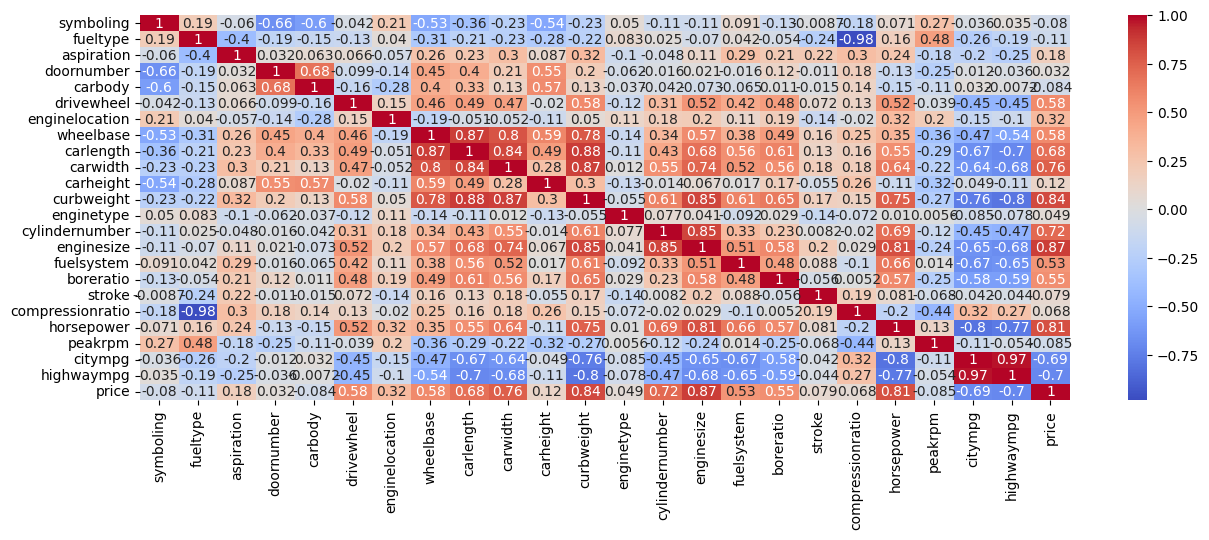

In [ ]:
plt.figure(figsize=(15,5))
sns.heatmap(correlation, annot=True, cmap='coolwarm')


### Inferences
There is a strong to moderate correlation of charges column with the following columns:

1. 'drivewheel'
2. 'wheelbase'
3. 'carlength'
4. 'carwidth'
5. 'curbweight'
6. 'enginesize'
7. 'fuelsystem'
8. 'boreratio'
9. 'horsepower'
10. 'enginelocation'
11. 'cylindernumber'

The correlation heatmap shows the columns that will be most useful for the modeling. Except for the mentioned columns above no other columns shows considerable correlation. So, we are not considering those columns.

## **Data Preprocessing before Model Training**

In [ ]:
X = cars[['drivewheel','wheelbase','carlength','carwidth','curbweight','enginesize','fuelsystem','boreratio','horsepower', 'enginelocation', 'cylindernumber']].copy()
Y = cars.iloc[:, -1]
#y = cars['price']


In [ ]:
#splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=49)

### **Standardizing the features**
Normalizing the features so that the samples will have the same mean and standard deviation.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[-0.53033009,  1.32466586,  1.58180015, ...,  0.16405499,
        -0.11111111,  0.55726174],
       [-0.53033009,  0.88109105,  0.09147591, ..., -0.38198782,
        -0.11111111, -0.3300288 ],
       [ 1.28163104,  1.05852097,  1.26068056, ...,  0.2633355 ,
        -0.11111111, -0.3300288 ],
       ...,
       [ 1.28163104,  0.01168441,  0.22321728, ...,  0.31297576,
        -0.11111111, -0.3300288 ],
       [-0.53033009,  0.72140411,  0.17381426, ..., -0.28270731,
        -0.11111111, -0.3300288 ],
       [ 1.28163104,  0.01168441,  0.22321728, ...,  0.31297576,
        -0.11111111, -0.3300288 ]])

In [ ]:
y_train = y_train.values.reshape(-1,1)
y_train

array([[17710.   ],
       [ 8921.   ],
       [15985.   ],
       [16558.   ],
       [ 6795.   ],
       [11595.   ],
       [ 7609.   ],
       [ 7775.   ],
       [17199.   ],
       [13845.   ],
       [ 5389.   ],
       [ 5151.   ],
       [11549.   ],
       [16925.   ],
       [ 7126.   ],
       [ 9279.   ],
       [14869.   ],
       [ 7609.   ],
       [11259.   ],
       [13295.   ],
       [ 7499.   ],
       [23875.   ],
       [30760.   ],
       [11900.   ],
       [45400.   ],
       [11850.   ],
       [ 6295.   ],
       [10345.   ],
       [ 8916.5  ],
       [ 9538.   ],
       [ 7898.   ],
       [13495.   ],
       [ 6229.   ],
       [ 9295.   ],
       [11694.   ],
       [ 6095.   ],
       [ 7995.   ],
       [12940.   ],
       [16500.   ],
       [17859.167],
       [ 9258.   ],
       [ 9980.   ],
       [ 6479.   ],
       [13499.   ],
       [ 5499.   ],
       [40960.   ],
       [ 7738.   ],
       [ 6529.   ],
       [ 6377.   ],
       [ 5399.   ],


In [ ]:
y_train = sc.fit_transform(y_train)

In [ ]:
y_train

array([[ 0.63478505],
       [-0.51413773],
       [ 0.4092882 ],
       [ 0.48419237],
       [-0.79205442],
       [-0.16458493],
       [-0.68564605],
       [-0.66394607],
       [ 0.56798569],
       [ 0.12954139],
       [-0.97585069],
       [-1.00696272],
       [-0.17059818],
       [ 0.53216764],
       [-0.74878517],
       [-0.46733896],
       [ 0.26340155],
       [-0.68564605],
       [-0.2085078 ],
       [ 0.05764384],
       [-0.70002556],
       [ 1.44069117],
       [ 2.34071772],
       [-0.12471448],
       [ 4.25449965],
       [-0.13125062],
       [-0.85741582],
       [-0.32798845],
       [-0.51472598],
       [-0.43348175],
       [-0.64786716],
       [ 0.08378841],
       [-0.86604353],
       [-0.4652474 ],
       [-0.15164337],
       [-0.88356039],
       [-0.63518705],
       [ 0.01123725],
       [ 0.47661045],
       [ 0.65428458],
       [-0.47008414],
       [-0.37570227],
       [-0.83336283],
       [ 0.0843113 ],
       [-0.96147118],
       [ 3

## **Model Building**

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

## **Making Predictions**

In [ ]:
#making predictions
predictions = lr.predict(X_test)

In [ ]:
predictions

array([[-0.09840068],
       [ 2.59813568],
       [ 0.47376664],
       [ 0.87911499],
       [-0.70882057],
       [-0.0898418 ],
       [-0.79667527],
       [-0.44657659],
       [-0.60640505],
       [ 2.02859279],
       [-0.61270476],
       [ 2.68940436],
       [ 1.52982301],
       [-0.59220188],
       [ 0.81795017],
       [ 0.75792115],
       [ 0.53177567],
       [ 0.87111876],
       [ 0.28159998],
       [ 1.01296682],
       [ 1.7870026 ],
       [-0.43272943],
       [ 1.63411283],
       [-0.34938753],
       [-0.101312  ],
       [ 0.50099718],
       [-0.85051584],
       [ 0.80563089],
       [-0.85920623],
       [ 0.46465578],
       [-0.87232769],
       [-0.52961581],
       [-0.82880436],
       [-0.28565864],
       [ 1.11492353],
       [-0.43313256],
       [ 0.63843161],
       [-0.87077599],
       [ 1.50130416],
       [-0.78854293],
       [-0.84589263]])

In [ ]:
predictions = sc.inverse_transform(predictions)
predictions

array([[12101.29457469],
       [32729.18930448],
       [16478.24550529],
       [19579.06893251],
       [ 7431.72020749],
       [12166.76810244],
       [ 6759.65153596],
       [ 9437.82741498],
       [ 8215.17577426],
       [28372.31474613],
       [ 8166.9844432 ],
       [33427.37411393],
       [24556.83848872],
       [ 8323.82680169],
       [19111.17184628],
       [18651.96341088],
       [16922.00148355],
       [19517.89958012],
       [15008.21390429],
       [20603.00523064],
       [26524.20428569],
       [ 9543.75512132],
       [25354.63205177],
       [10181.30179838],
       [12079.02363104],
       [16686.55300116],
       [ 6347.78329533],
       [19016.93211192],
       [ 6281.30382508],
       [16408.54946089],
       [ 6180.92760231],
       [ 8802.59615851],
       [ 6513.87124379],
       [10668.8134981 ],
       [21382.95102203],
       [ 9540.67126259],
       [17737.89538996],
       [ 6192.79778733],
       [24338.6756617 ],
       [ 6821.86214459],


## **Model Evaluation**

In [ ]:
from sklearn.metrics import *

r2_score(y_test, predictions)

0.8993317638890342

**Visually represent actual and predicted values**

In [ ]:
actual_data = y_test.values
predicted_data = predictions.ravel()

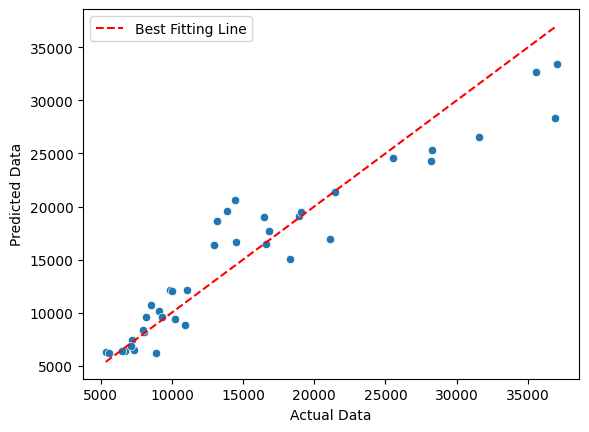

In [ ]:
sns.scatterplot(x=actual_data, y=predicted_data)
# best fitting line
plt.plot([actual_data.min(), actual_data.max()], [actual_data.min(), actual_data.max()],
         color='red', linestyle='--', label="Best Fitting Line")
plt.legend()

plt.xlabel('Actual Data')
plt.ylabel('Predicted Data')
plt.show()